# Chapter 17: Autoencoders dan GANs Code Reproduction

In [1]:
# Impor umum
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Memuat dan menyiapkan dataset Fashion MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train[:-5000], X_train[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

# Fungsi helper untuk plot gambar
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.3965 - val_loss: 0.3155
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3108 - val_loss: 0.3061
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3035 - val_loss: 0.3013
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2977 - val_loss: 0.2988
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2946 - val_loss: 0.2943
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.2925 - val_loss: 0.2945
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2902 - val_loss: 0.2923
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2890 - val_loss: 0.2922
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2884 - val_loss: 0.2882
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2866 - val_loss: 0.2873

Rekonstruksi dari Autoencoder Sederhana:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


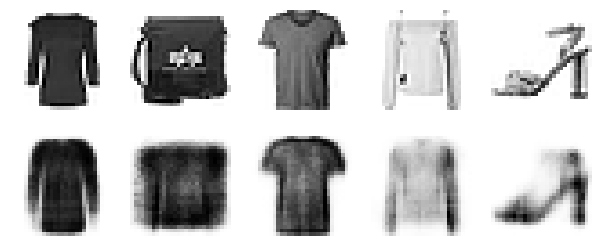

In [2]:
# Auto Encoder
# Membangun encoder
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"), # Lapisan 'coding' atau representasi laten
])

# Membangun decoder
decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

# Menggabungkan encoder dan decoder menjadi autoencoder
autoencoder = keras.models.Sequential([encoder, decoder])

# Mengompilasi dan melatih model
autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))
history = autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

# Visualisasi hasil rekonstruksi
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])
    plt.show()

print("\nRekonstruksi dari Autoencoder Sederhana:")
show_reconstructions(autoencoder)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3979 - val_loss: 0.3169
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3145 - val_loss: 0.3074
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3068 - val_loss: 0.3034
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3027 - val_loss: 0.2992
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3002 - val_loss: 0.2977
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2979 - val_loss: 0.2949
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2958 - val_loss: 0.2940
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2947 - val_loss: 0.2931
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2938 - val_loss: 0.2920
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2922 - val_loss: 0.2914

Rekonstruksi dari Denoising Autoencoder:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step


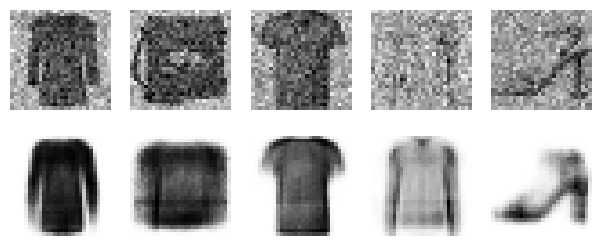

In [3]:
# Denoising Autoencoder
# Menambahkan noise pada gambar menggunakan GaussianNoise
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2), # Menambahkan noise
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

denoising_autoencoder = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0))
history_denoising = denoising_autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

# Visualisasi hasil denoising
# Kita tambahkan noise secara manual ke validation set untuk melihat hasilnya
noise_layer = keras.layers.GaussianNoise(0.2)
X_valid_noisy = noise_layer(X_valid, training=True)
print("\nRekonstruksi dari Denoising Autoencoder:")
show_reconstructions(denoising_autoencoder, images=X_valid_noisy)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_123']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_130']
Received: inputs=Tensor(shape=(None, 10))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_123']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_130']
Received: inputs=Tensor(shape=(None, 10))
  warnings.warn(msg)


430/430 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4202

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_123']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_130']
Received: inputs=Tensor(shape=(None, 10))
  warnings.warn(msg)


430/430 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.4201 - val_loss: 0.3259
Epoch 2/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3212 - val_loss: 0.3149
Epoch 3/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3128 - val_loss: 0.3132
Epoch 4/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3070 - val_loss: 0.3055
Epoch 5/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3029 - val_loss: 0.3023
Epoch 6/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2997 - val_loss: 0.3010
Epoch 7/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2975 - val_loss: 0.2982
Epoch 8/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2966 - val_loss: 0.2963
Epoch 9/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2942 - val_loss: 0.3001
Epoch 10/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2941 - val_loss: 0.2952
Epoch 11/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2938 - val_loss: 0.2930
Epoch 12/25
430/430 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_130']
Received: inputs=Tensor(shape=(12, 10))
  warnings.warn(msg)


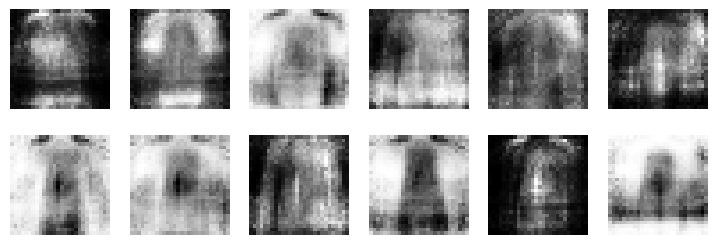

In [10]:
# Variational Autoencoder (VAE)
# Layer kustom untuk sampling (Reparameterization Trick)
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        # Use keras.backend for symbolic operations
        # tf.shape(log_var) works directly with Keras Tensors
        # Keras backend functions work on Keras tensors
        return keras.backend.random_normal(shape=keras.backend.shape(log_var)) * keras.backend.exp(log_var / 2) + mean

# Custom layer for VAE latent loss
class VAELatentLoss(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        # Add the KL divergence loss here, using the inputs to the call method
        self.add_loss(-0.5 * keras.backend.mean(
            keras.backend.constant(1.0) + log_var - keras.backend.exp(log_var) - keras.backend.square(mean)))
        return inputs # Pass through the inputs


# Membangun VAE
codings_size = 10

# Encoder VAE
inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.Model(inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

# Decoder VAE
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.Model(inputs=[decoder_inputs], outputs=[outputs])

# Menggabungkan menjadi VAE
# Pass the original inputs tensor to the encoder
codings_mean, codings_log_var, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)

# Add the VAE latent loss layer
vae_latent_loss_layer = VAELatentLoss()([codings_mean, codings_log_var])


# Build the autoencoder model by defining its inputs and outputs
variational_autoencoder = keras.Model(inputs=[inputs], outputs=[reconstructions])


# Kompilasi dan latih VAE
variational_autoencoder.compile(loss="binary_crossentropy", optimizer="rmsprop")
history_vae = variational_autoencoder.fit(X_train, X_train, epochs=25, batch_size=128,
                                          validation_data=(X_valid, X_valid))

# Menghasilkan gambar baru dengan VAE
def plot_multiple_images(images, n_cols=None):
    # ... (fungsi plot dari buku)
    n_rows = (len(images) - 1) // n_cols + 1
    plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")
    plt.show()

codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()
print("\nGambar yang Dihasilkan oleh VAE:")
plot_multiple_images(images, n_cols=6)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Gambar yang dihasilkan pada epoch 5:


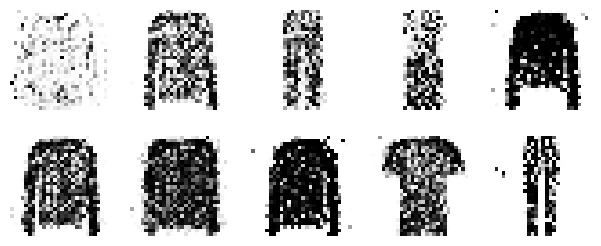

Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Gambar yang dihasilkan pada epoch 10:


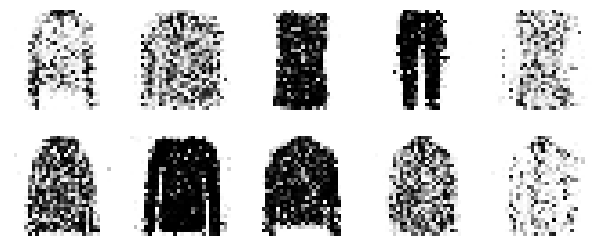

In [11]:
# Generative Adversarial Networks (GANs)
# Menyiapkan data untuk GAN (scaling ke [-1, 1])
X_train_gan = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

# Membangun Generator
codings_size = 30
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="tanh"),
    keras.layers.Reshape([28, 28, 1])
])

# Membangun Discriminator
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])

# Membangun model GAN
gan = keras.models.Sequential([generator, discriminator])

# Mengompilasi model
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False # Penting: bekukan discriminator saat melatih generator
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

# Loop Pelatihan Kustom untuk GAN
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_gan).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print(f"Epoch {epoch+1}/{n_epochs}")
        for X_batch in dataset:
            # Fase 1: Melatih discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)

            # Fase 2: Melatih generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)

        # Plot hasil generator setiap epoch
        if (epoch+1) % 5 == 0:
            noise = tf.random.normal(shape=[10, codings_size])
            generated_images = generator(noise)
            print(f"Gambar yang dihasilkan pada epoch {epoch+1}:")
            plot_multiple_images(generated_images.numpy().reshape(-1, 28, 28), n_cols=5)

# Mulai pelatihan GAN
train_gan(gan, dataset, batch_size, codings_size, n_epochs=10) # Latih untuk 10 epoch saja untuk demonstrasi